<a href="https://colab.research.google.com/github/saifulrijal-ds/python-tutorial/blob/master/Python_Seaborn_Tuorial_Pokemon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Isi notebook ini merupakan pembelajaran pribadi berdasarkan tutorial dari [Elite Data Science: The Ultimate Python Seaborn Tutorial: Gotta Catch ‘Em All](https://elitedatascience.com/python-seaborn-tutorial) dan dengan menggunakan Google Colab. Review/ulasan dari Anda sangat dinanti.





In [1]:
# Menghubungkan dengan google drive

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Pandas digunakan untuk mengelola dataset
import pandas as pd

# Matplotlib untuk penyesuaian tambahan
from matplotlib import pyplot as plt
%matplotlib inline

# Seaborn untuk plotting dan styling
import seaborn as sns

In [0]:
# import dataset
# google colab harus terhubung dengan google drive, salin path file di google
# drive melalui tab sebelah kiri (antarmuka google colab)
path = '/content/drive/My Drive/Colab Notebooks/Pokemon.csv'
pokemon = pd.read_csv(path, index_col=0, encoding='unicode_escape')
# encoding='unicode_escape' digunakan karena terjadi error akibat encoding

In [0]:
# print('pokemon.keys():\n{}'.format(pokemon.keys()))

In [5]:
print('pokemon.columns:\n{}'.format(pokemon.columns))

pokemon.columns:
Index(['Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Stage', 'Legendary'],
      dtype='object')


In [6]:
print('pokemon.shape:\n{}'.format(pokemon.shape))

pokemon.shape:
(151, 12)


In [7]:
pokemon.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


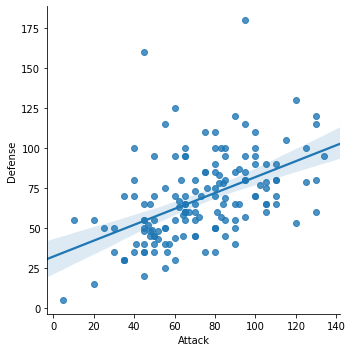

In [8]:
# membuat scatter plot membandingkan status Attack dan Defense
# cara yang dianjurkan
%matplotlib inline
sns.lmplot(x='Attack', y='Defense', data=pokemon)

# cara lain
# sns.lmplot(x=df.Attack, y=df.Defense)

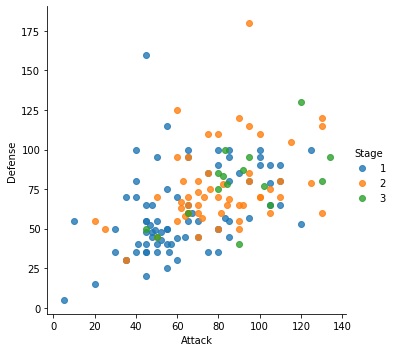

In [9]:
# Seaborn tidak memiliki fungsi khusu scatter plot
# melainkan fungsi untuk fitting dan plotting
# regression line

sns.lmplot(x='Attack', y='Defense', data=pokemon,
           fit_reg=False,
           hue='Stage')

(0, 150)

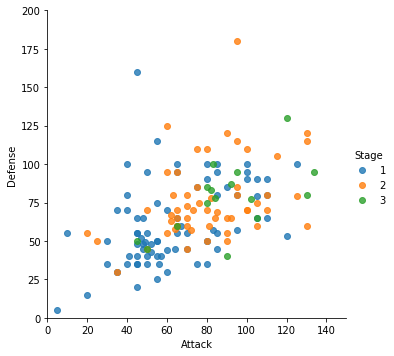

In [10]:
sns.lmplot(x='Attack', y='Defense', data=pokemon,
           hue='Stage', fit_reg=False)

# tingkatkan dengan matplotlib
plt.ylim(0, 200)
plt.xlim(0, 150)

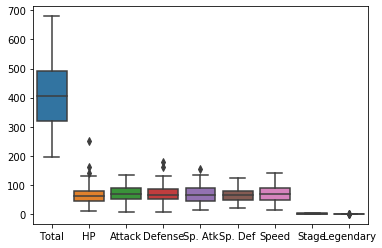

In [11]:
# boxplot
sns.boxplot(data=pokemon)

Karena fokus kita adalah combat stats maka kita dapat menghapus label Total, Stage, dan Legendary.

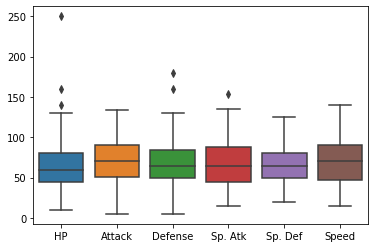

In [12]:
# pre-format dataframe pokemon
stats_pokemon = pokemon.drop(['Total', 'Stage', 'Legendary'], axis=1)

# bloxpot baru menggunakan dataframe stats_pokemon
sns.boxplot(data=stats_pokemon)

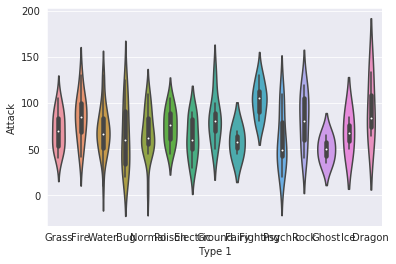

In [13]:
# distribusi Attack berdasarkan tipe primer(utama) pokemon

# Set tema
sns.set_style('darkgrid')

#violin plot
sns.violinplot(x='Type 1', y='Attack', data=pokemon)

Mari kita warnai sesuai dengan warna tipe, misal tipe grass dengan warna hijau. Mari kita gunakan template warna dari [Bulbapedia](https://bulbapedia.bulbagarden.net/wiki/Category:Type_color_templates)

In [0]:
#diurutkan sesuai urutan tipe pada data
pkmn_type_color = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon                 
]

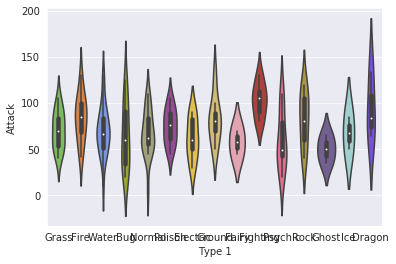

In [15]:
sns.violinplot(x='Type 1', y='Attack', data=pokemon, palette=pkmn_type_color)

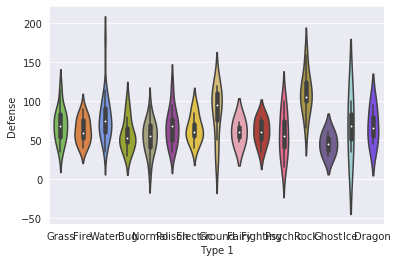

In [18]:
# mari kita coba violon plot dengan persebaran 'Defense'
%matplotlib inline
sns.violinplot(x='Type 1', y='Defense', data=pokemon, palette=pkmn_type_color)